## MA-IRL 
- linear quadratic case
- asynchronous update

In [1]:
using PyPlot
using JLD2, FileIO
using StatsBase, LinearAlgebra

#### normalized feature counts 
- decaying learning rate 
- number of demonstrations 3000, each iteration has 200 samples to increase randomness

In [2]:
@load "../data/2020-07-09T11:18:34.535.jld2"  data     # normalized feature

1-element Array{Symbol,1}:
 :data

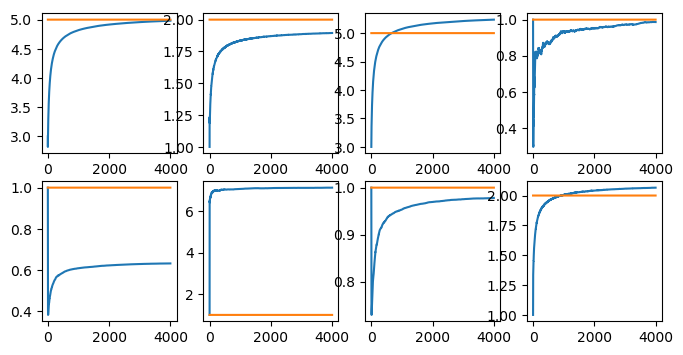

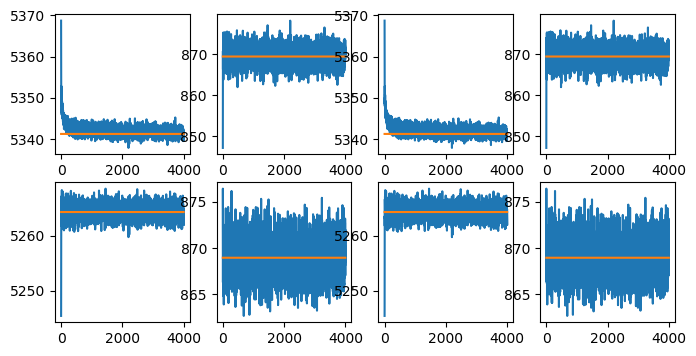

In [3]:
fc_difference = []
for i = 1:length(data["feature_counts_proposed"])
    fc_d = []
    for itr = 1:length(data["feature_counts_proposed"][1])
        push!(fc_d, data["feature_counts_demonstration"][i] - data["feature_counts_proposed"][i][itr])
    end
    push!(fc_difference, fc_d)
end 


# plot the theta estimation 
rows = 2 
cols = 4 
figsize=(8,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][idx])
    ax.plot(ones(length(data["theta_est"][idx])) * data["true theta"][idx])
end 


# plot the feature counts vs. feature counts from demonstration
rows = 2 
cols = 4 
figsize=(8,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][idx])
    ax.plot(ones(length(data["feature_counts_proposed"][idx])) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 


In [4]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:4]' * data["true theta"][1:4]
cost_dem_2 = data["feature_counts_demonstration"][5:end]' * data["true theta"][5:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:4])
println(" true theta ", data["true theta"])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(hcat(data["feature_counts_proposed"]...)[end-100:end,:], dims=1)
println(" est feature counts ", fc_avg[1:4])
theta_avg = mean(hcat(data["theta_est"]...)[end-100:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:4], theta_avg[5:end])
cost_est_1 = fc_avg[1:4]' * theta_avg[1:4]
cost_est_2 = fc_avg[5:end]' * theta_avg[5:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [5341.26, 5264.3, 869.437, 868.953]
 true theta [5.0, 1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 2.0]
 this is demonstrated cost: player 1- 34578.420605907035 and player 2- 34577.936418298916
 ----- estimation ---- 
 est feature counts [5341.53, 5264.33, 869.583, 869.221]
 estimated  theta [4.98104, 0.632119, 1.89474, 7.12798][5.23591, 0.977848, 0.987029, 2.06541]
 this is estimated cost: player 1- 37777.46864725318 and player 2- 35769.104935914314


#### unnormalized feature counts
- decaying learning rate

In [5]:
@load "../data/2020-07-09T11:28:37.484.jld2"  data   # unnormalized feature

1-element Array{Symbol,1}:
 :data

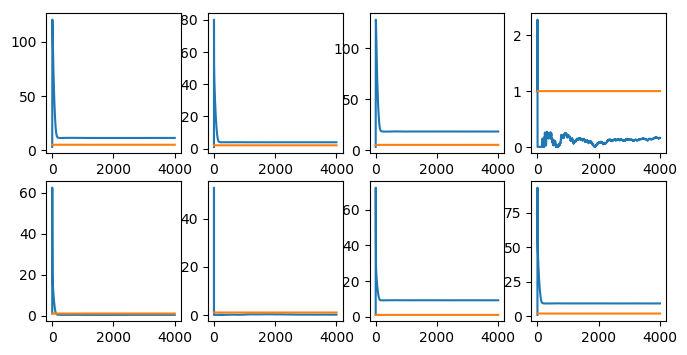

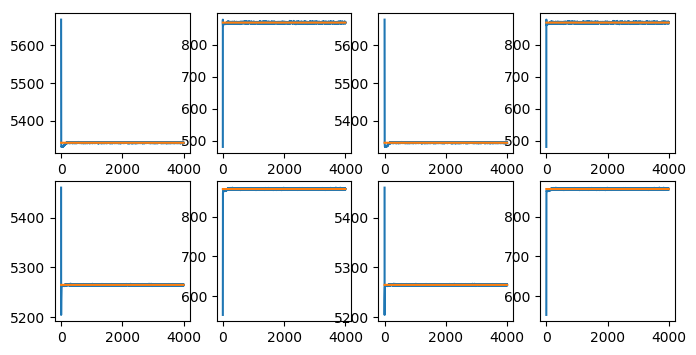

In [6]:
fc_difference = []
for i = 1:length(data["feature_counts_proposed"])
    fc_d = []
    for itr = 1:length(data["feature_counts_proposed"][1])
        push!(fc_d, data["feature_counts_demonstration"][i] - data["feature_counts_proposed"][i][itr])
    end
    push!(fc_difference, fc_d)
end 


rows = 2 
cols = 4 
figsize=(8,4)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta) 
    ax.plot(data["theta_est"][idx])
    ax.plot(ones(length(data["theta_est"][idx])) * data["true theta"][idx])
end 
rows = 2 
cols = 4 
figsize=(8,4)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc) 
    ax.plot(data["feature_counts_proposed"][idx])
    ax.plot(ones(length(data["feature_counts_proposed"][idx])) * data["feature_counts_demonstration"][idx])
#     ax.plot(fc_difference[idx])
#     ax.set_yscale("log")
end 

In [7]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:4]' * data["true theta"][1:4]
cost_dem_2 = data["feature_counts_demonstration"][5:end]' * data["true theta"][5:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:4])
println(" true theta ", data["true theta"])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2)


# estimation
println(" ----- estimation ---- ")
fc_avg = mean(hcat(data["feature_counts_proposed"]...)[end-100:end,:], dims=1)
println(" est feature counts ", fc_avg[1:4])
theta_avg = mean(hcat(data["theta_est"]...)[end-100:end,:], dims=1)
println(" estimated  theta ", theta_avg[1:4], theta_avg[5:end])
cost_est_1 = fc_avg[1:4]' * theta_avg[1:4]
cost_est_2 = fc_avg[5:end]' * theta_avg[5:end]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2)

 ----- demonstration ---- 
 demo feature counts [5341.16, 5264.49, 869.172, 869.211]
 true theta [5.0, 1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 2.0]
 this is demonstrated cost: player 1- 34577.826976850905 and player 2- 34577.866447838576
 ----- estimation ---- 
 est feature counts [5341.16, 5264.46, 869.086, 869.328]
 estimated  theta [11.2809, 0.343157, 3.88283, 0.101192][18.0574, 9.20239, 0.159345, 9.30486]
 this is estimated cost: player 1- 65522.07587223276 and player 2- 153120.60096306138
